In [7]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

importing the necessary libaries and uploading our dataset from the local directory.

In [50]:
#uploading our dataset from a local directory
df = pd.read_csv(r'C:/Users/test/Documents/tochora/dd/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


NB: this dataset can be found on kaggle

In [51]:
# hsape of our dataset
df.shape

(20491, 2)

our datset has 20491 rows and 2 columns

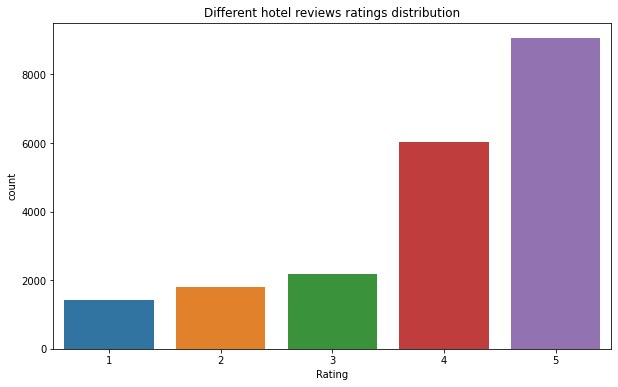

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Rating'])
plt.title('Different hotel reviews ratings distribution')
plt.show()

Reviews rated 5 has the highest distribution while reviews rated 1 has the lowest distribution.reviews rated 4 and 5 has higher  distribution showing that most clients found the hotel services satisfying and only few of them were disatisfied.

count    1421.000000
mean      112.365236
std        99.834855
min        12.000000
25%        51.000000
50%        82.000000
75%       137.000000
max       954.000000
Name: Length, dtype: float64

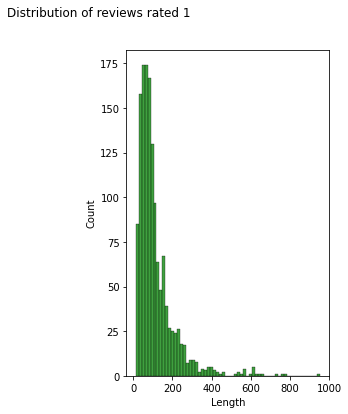

In [56]:
# distribution of reviews rated 1
# statistics derived from those reviews
fig = plt.figure(figsize=(8,6))
axx = fig.add_subplot(122)
df['Length'] = df.Review.str.split().apply(len)
sns.histplot(df[df['Rating']==1]['Length'], ax=axx, color='green')
plt.suptitle('Distribution of reviews rated 1')
display(df.Length[df['Rating']==1].describe())

count    1793.000000
mean      126.601227
std       108.269031
min        10.000000
25%        63.000000
50%        95.000000
75%       148.000000
max      1109.000000
Name: Length, dtype: float64

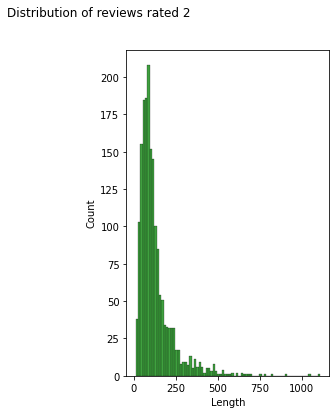

In [57]:
# Distribution of reviews rated 2
# statistics
fig = plt.figure(figsize=(8,6))
axx2 = fig.add_subplot(122)
df['Length'] = df.Review.str.split().apply(len)
sns.histplot(df[df['Rating']==2]['Length'], ax=axx2, color='green')
plt.suptitle('Distribution of reviews rated 2')
display(df.Length[df['Rating']==2].describe())

count    2184.000000
mean      114.705586
std       109.023017
min         9.000000
25%        54.000000
50%        86.000000
75%       134.000000
max      1931.000000
Name: Length, dtype: float64

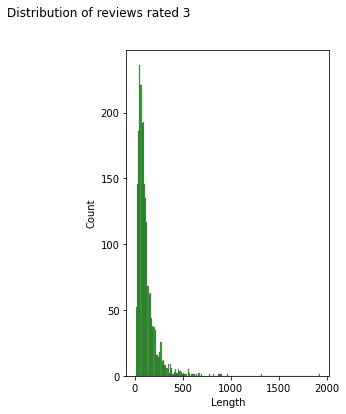

In [55]:
#distibution of reviews rated3
# statistics
fig = plt.figure(figsize=(8,6))
axx3 = fig.add_subplot(122)
df['Length'] = df.Review.str.split().apply(len)
sns.histplot(df[df['Rating']==3]['Length'], ax=axx3, color='green')
plt.suptitle('Distribution of reviews rated 3')
display(df.Length[df['Rating']==3].describe())

count    6039.000000
mean      107.771651
std       107.132817
min         9.000000
25%        49.000000
50%        78.000000
75%       128.000000
max      1458.000000
Name: Length, dtype: float64

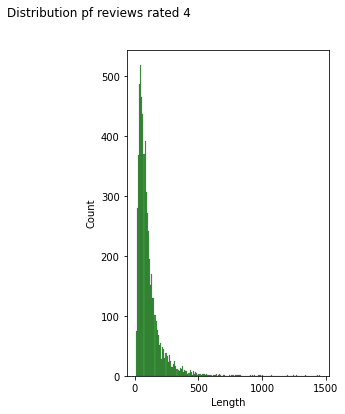

In [58]:
# distribution of reviews rated 4
#its statistics
fig = plt.figure(figsize=(8,6))
axx4 = fig.add_subplot(122)
df['Length'] = df.Review.str.split().apply(len)
sns.histplot(df[df['Rating']==4]['Length'], ax=axx4, color='green')
plt.suptitle('Distribution pf reviews rated 4')
display(df.Length[df['Rating']==4].describe())

count    9054.000000
mean       93.963773
std        90.977999
min         7.000000
25%        44.000000
50%        69.000000
75%       111.000000
max      1755.000000
Name: Length, dtype: float64

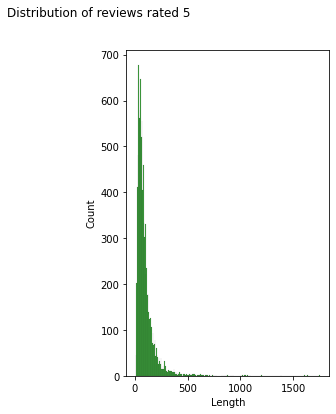

In [59]:
#Distribution of reviews rated 5
# its statistics
fig = plt.figure(figsize=(8,6))
ax5 = fig.add_subplot(122)
df['Length'] = df.Review.str.split().apply(len)
sns.histplot(df[df['Rating']==5]['Length'], ax=ax5, color='green')
plt.suptitle('Distribution of reviews rated 5')
display(df.Length[df['Rating']==5].describe())

These reviews have distributions that are skewed to the left.They can be normalised by applying the log function

WordCloud.This is the visual representation of words in a text in a diagram format. The words that large are frequent are the most important words in reviews displayed in the wordcloud

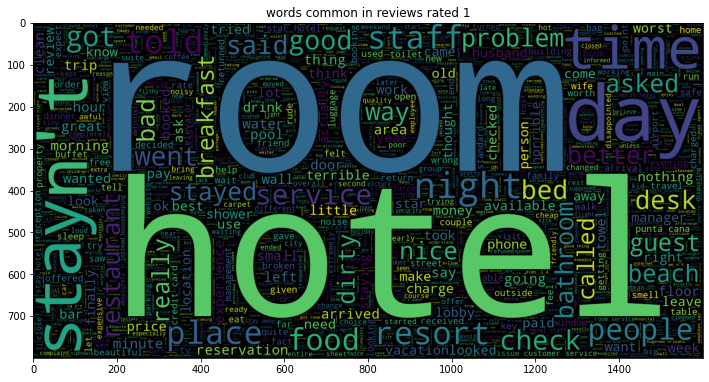

In [60]:
from wordcloud import WordCloud
plt.figure(figsize=(12, 10))
wm1 = WordCloud(max_words=3000, height=800, width=1600,background_color='black').generate(
    " ".join(df[df['Rating']==1].Review)
)
plt.title('words common in reviews rated 1')
plt.imshow(wm1)

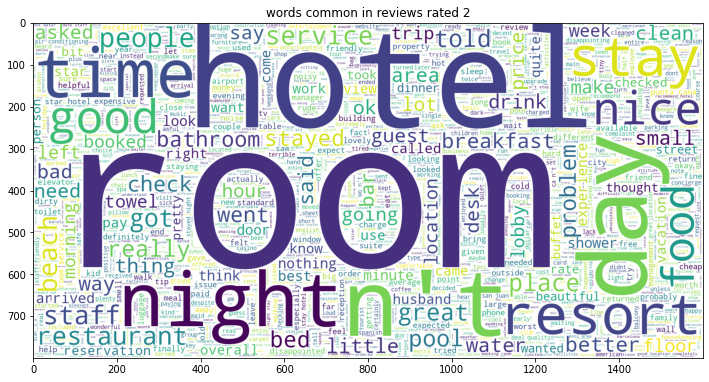

In [61]:
plt.figure(figsize=(12, 10))
wm2 = WordCloud(max_words=2000, height=800, width=1600,background_color='white').generate(
    " ".join(df[df['Rating']==2].Review)
)
plt.title('words common in reviews rated 2')
plt.imshow(wm2)

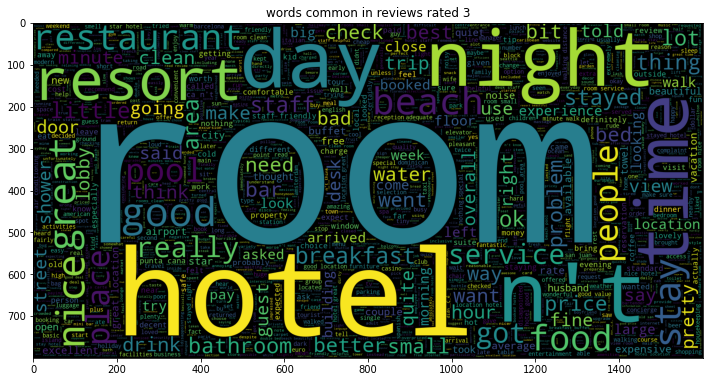

In [62]:
plt.figure(figsize=(12, 10))
wm3 = WordCloud(max_words=2000, height=800, width=1600,background_color='black').generate(
    " ".join(df[df['Rating']==3].Review)
)
plt.title('words common in reviews rated 3')
plt.imshow(wm3)

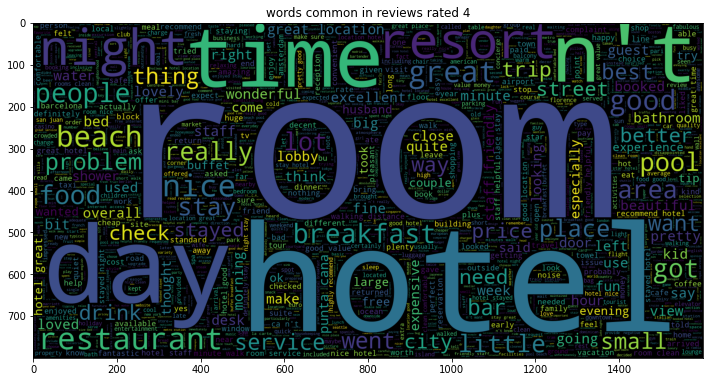

In [63]:
plt.figure(figsize=(12, 10))
wm4 = WordCloud(max_words=2000, height=800, width=1600,background_color='black').generate(
    " ".join(df[df['Rating']==4].Review)
)
plt.title('words common in reviews rated 4')
plt.imshow(wm4)

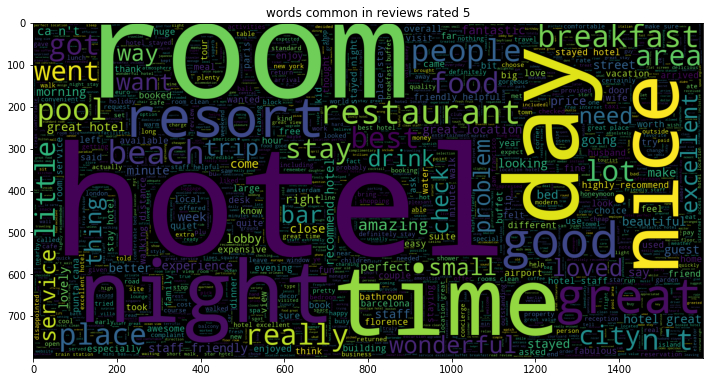

In [64]:
plt.figure(figsize=(12, 10))
wm5 = WordCloud(max_words=2000, height=800, width=1600,background_color='black').generate(
    " ".join(df[df['Rating']==5].Review)
)
plt.title('words common in reviews rated 5')
plt.imshow(wm5)

In [31]:
#  importing libraries necessary to clean our text
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# creating a function to clean our text
def preprocessing(data):
    corpus = []
    for i in range(len(data)):
        # removing urls 
        review1 = re.sub(r'https\S+',' ', df['Review'][i])
        # removing html tags
        review2 = re.sub(r'<.*?>', ' ', review1)
        # removing digits
        review3 = re.sub(r'\d',' ',review2)
        # renoving hashtags
        review4 = re.sub(r'#\w+','', review3)
        # removing punctauation marks
        review = re.sub(r'[^a-zA-Z]',' ', review4)
        # converting out text from proper case to lower case
        review = review.lower()
        # splitting the words to create spaces in the text
        review = review.split()
        # removing stopwords which less important and frequent words like prepositions and auxilliary verbs
        review = [word for word in review if word not in set(stopwords.words('english'))]
        # converting words in the text from various forms to its basic form
        review = [ps.stem(word) for word in review]
        # joining the spaces in the text
        review = " ".join(review)
        corpus.append(review)
    return corpus



In [32]:
#applyingour function to clean up text
corpus_t = preprocessing(df)

In [35]:
# first two paragraphs in our text
corpus_t[:2]

['nice hotel expens park got good deal stay hotel anniversari arriv late even took advic previou review valet park check quick easi littl disappoint non exist view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night',
 'ok noth special charg diamond member hilton decid chain shot th anniversari seattl start book suit paid extra websit descript suit bedroom bathroom standard hotel room took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast got kid embassi suit sit room bathroom bedroom unlik kimpton call suit day stay offer correct fals advertis send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard

In [38]:
# mapping various review ratings into groups of 1 and zero
def sentiment(review):
    if review >= 3:
        return 1
    else:
        return 0
df['sentiment'] = df['Rating'].apply(sentiment)

In [39]:
# Dropping columns that are no longer necessary
df.drop(columns=['Length', 'Rating'], axis=1,inplace=True)

In [40]:
df.head()

,Review,sentiment
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,1
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1


In [41]:
# splitting our dataset into x and y variables
x = corpus_t
y = df['sentiment']

Bag of words

In [43]:
# applying tfidVectorizer to give words that are less frequent but important in our text more weight
# max-features denote the iterations that tfidvectorizer will iterate our text
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
# splittting our dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
x_train = tfid.fit_transform(x_train)
x_test = tfid.transform(x_test)

In [45]:
# modelling our data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# fitiing our data
lr.fit(x_train,y_train)
#accuracy of our model
acc = lr.score(x_test,y_test)
print(acc)

0.9259921925829538


our model has an accuracy of 93%